In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA

/var/folders/m5/flclr2h56f56f4j7mr5_8qk80000gn/T/ipykernel_3488/3977698048.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
data = pd.read_csv('../data/retail_store_data_with_real_items.csv')
data.head()

,Date,Day,Item Name,Price,In Stock,Total Stock,Sales,Stock Left,Revenue
0,2022-01-01,Saturday,Tea,11.65,True,64,19,45,221.35
1,2022-01-01,Saturday,Shaving Cream,36.52,True,78,23,55,839.96
2,2022-01-01,Saturday,All-Purpose Cleaner,13.58,True,109,28,81,380.24
3,2022-01-01,Saturday,Rice,6.30,True,187,14,173,88.20
4,2022-01-01,Saturday,Perfume,43.33,True,137,0,137,0.00


In [3]:
# Total unique items
total_unique_items = data['Item Name'].nunique()
print('Total unique items:', total_unique_items)

Total unique items: 99


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109600 entries, 0 to 109599
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Date         109600 non-null  object 
 1   Day          109600 non-null  object 
 2   Item Name    109600 non-null  object 
 3   Price        109600 non-null  float64
 4   In Stock     109600 non-null  bool   
 5   Total Stock  109600 non-null  int64  
 6   Sales        109600 non-null  int64  
 7   Stock Left   109600 non-null  int64  
 8   Revenue      109600 non-null  float64
dtypes: bool(1), float64(2), int64(3), object(3)
memory usage: 6.8+ MB


In [5]:
data['Item Name'].isnull()

0         False
1         False
2         False
3         False
4         False
          ...  
109595    False
109596    False
109597    False
109598    False
109599    False
Name: Item Name, Length: 109600, dtype: bool

In [6]:
data['Date'] = pd.to_datetime(data['Date'])

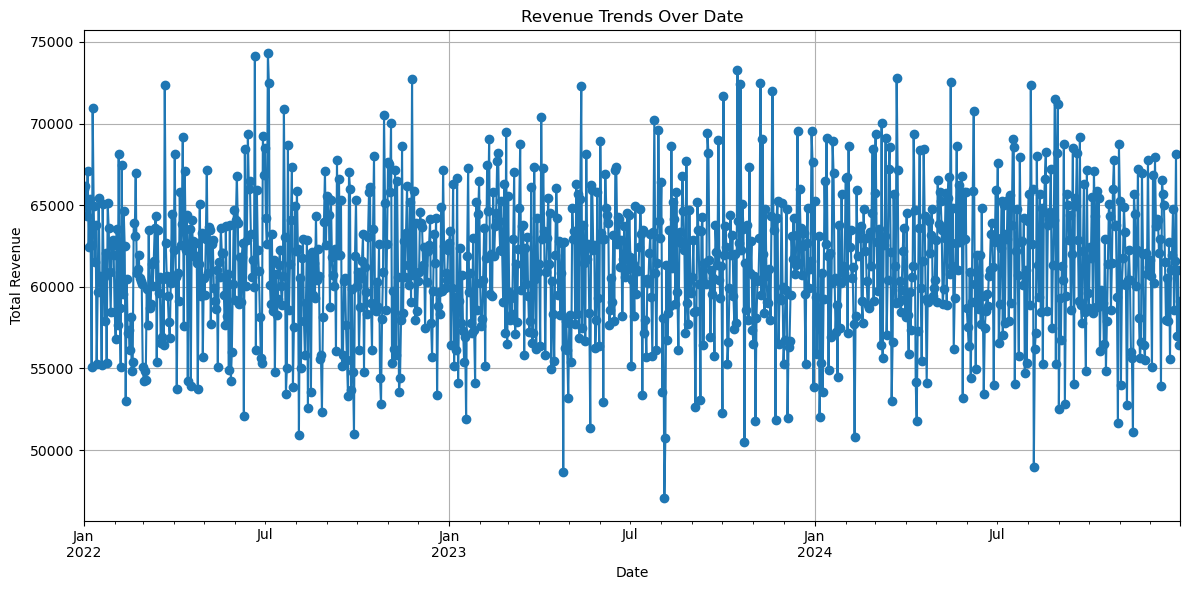

In [7]:
plt.figure(figsize=(12, 6))
data.groupby('Date')['Revenue'].sum().plot(kind='line', marker='o')
plt.title('Revenue Trends Over Date')
plt.xlabel('Date')
plt.ylabel('Total Revenue')
plt.grid(True)
plt.tight_layout()
plt.show()

In [8]:
data.isnull().sum()

Date           0
Day            0
Item Name      0
Price          0
In Stock       0
Total Stock    0
Sales          0
Stock Left     0
Revenue        0
dtype: int64

In [9]:
# Check for duplication
data.duplicated().sum()

0

In [10]:
def EDA(data):
    print("----------Structure of the Data--------- \n")
    print("Shape of the datasets:", data.shape)
    print("\n Column Names:", data.columns)
    print("\n First 5 rows: \n", data.head())
    print("\n Data Info:\n")
    data.info()
    print("\n----------End Structure of the Data--------- \n")
    print("\n----------Summary, Missing Value, Data types --------- \n")
    print("\nSummary Statistics:\n", data.describe())
    print("\nMissing Values:\n", data.isnull().sum())
    print("\nData Types:\n", data.dtypes)
    print("\n----------End Summary, Missing Value, Data types --------- \n")

In [11]:
EDA(data)

----------Structure of the Data--------- 

Shape of the datasets: (109600, 9)

 Column Names: Index(['Date', 'Day', 'Item Name', 'Price', 'In Stock', 'Total Stock', 'Sales',
       'Stock Left', 'Revenue'],
      dtype='object')

 First 5 rows: 
         Date       Day            Item Name  Price  In Stock  Total Stock  \
0 2022-01-01  Saturday                  Tea  11.65      True           64   
1 2022-01-01  Saturday        Shaving Cream  36.52      True           78   
2 2022-01-01  Saturday  All-Purpose Cleaner  13.58      True          109   
3 2022-01-01  Saturday                 Rice   6.30      True          187   
4 2022-01-01  Saturday              Perfume  43.33      True          137   

   Sales  Stock Left  Revenue  
0     19          45   221.35  
1     23          55   839.96  
2     28          81   380.24  
3     14         173    88.20  
4      0         137     0.00  

 Data Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109600 entries, 0 to 109599
Data c

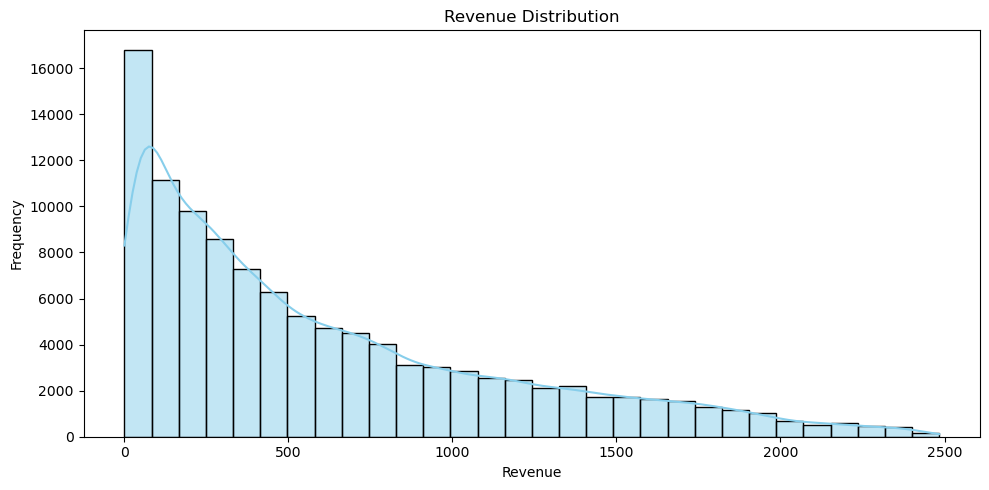

In [12]:
plt.figure(figsize=(10, 5))
sns.histplot(data['Revenue'], bins=30, kde=True, color='skyblue')
plt.title('Revenue Distribution')
plt.xlabel('Revenue')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

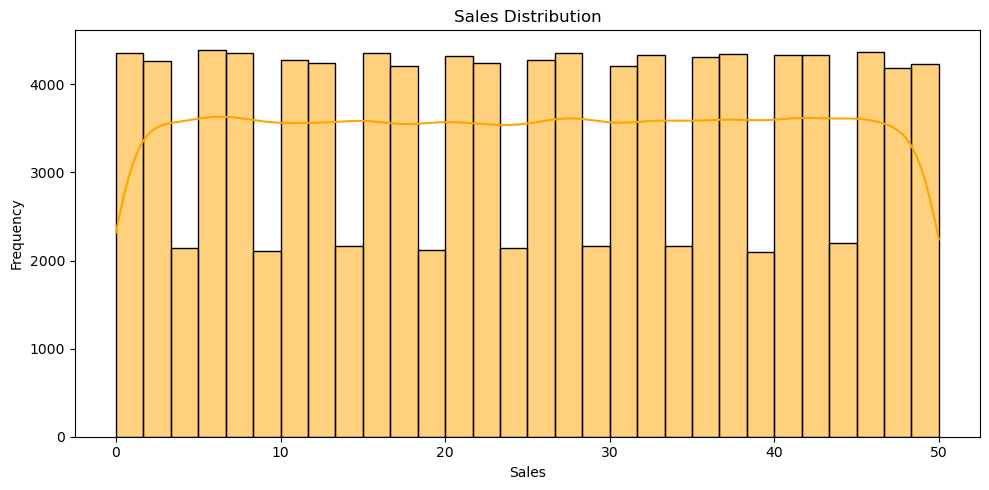

In [13]:
plt.figure(figsize=(10, 5))
sns.histplot(data['Sales'], bins=30, kde=True, color='orange')
plt.title('Sales Distribution')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

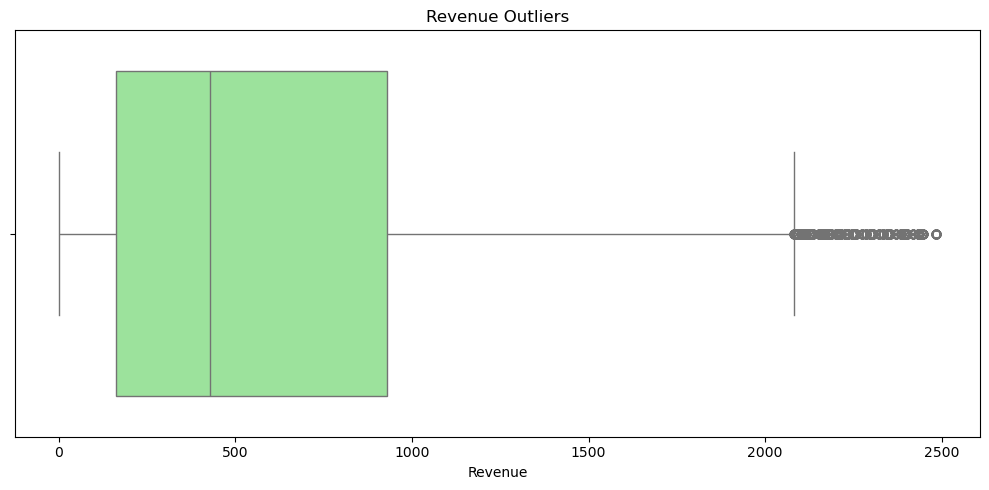

In [14]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=data, x='Revenue', color='lightgreen')
plt.title('Revenue Outliers')
plt.tight_layout()
plt.show()

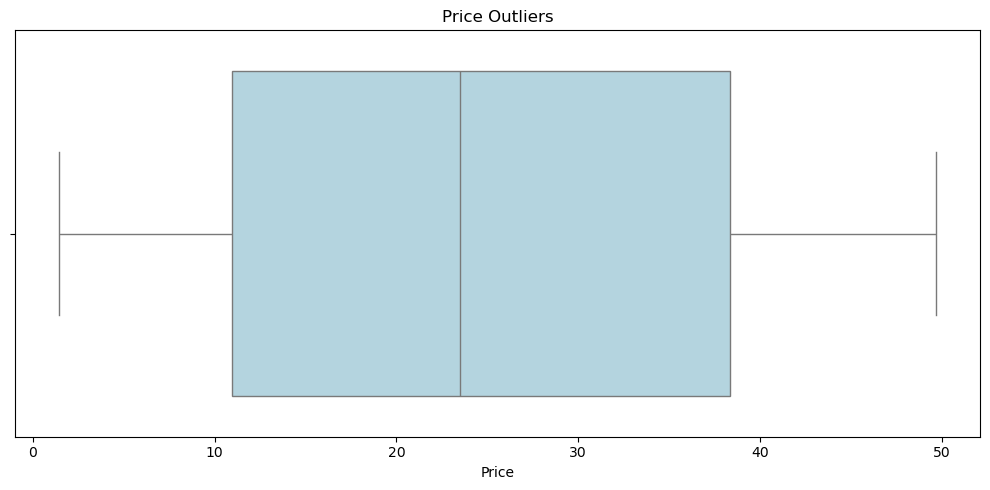

In [15]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=data, x='Price', color='lightblue')
plt.title('Price Outliers')
plt.tight_layout()
plt.show()

In [16]:
numeric_data = data.select_dtypes(include=['float64','int64'])

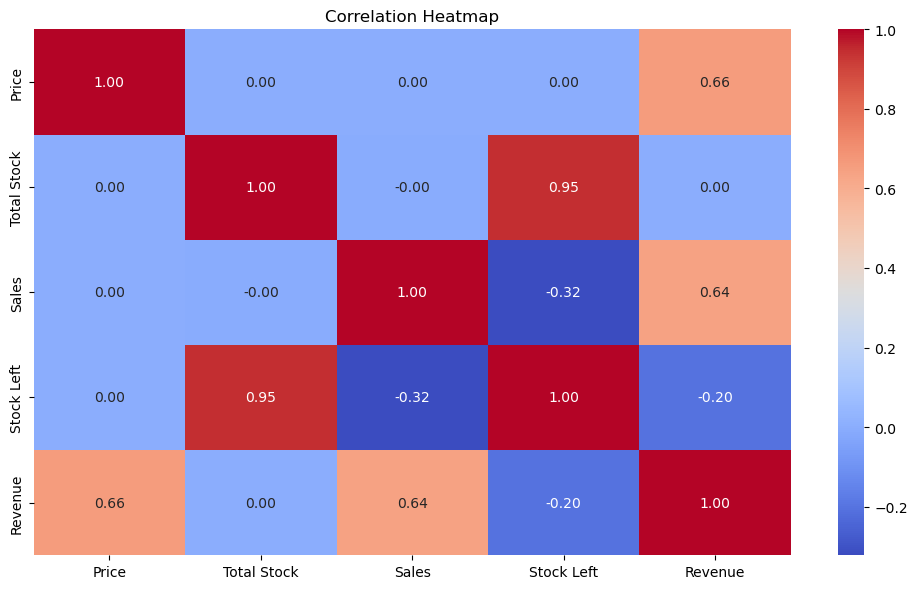

In [17]:
correlation = numeric_data.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()

In [18]:
# Top-20 selling items
data.groupby('Item Name')['Revenue'].sum().sort_values(ascending=False).head(20)

Item Name
Toilet Brush      1383289.92
Vitamins          1372481.44
Phone Case        1351620.36
Shower Curtain    1351205.02
Strawberries      1342968.12
Floss             1327292.70
Vodka             1320563.27
Mugs              1313939.52
Trash Bags        1306688.00
Lime              1304883.84
Extension Cord    1294907.32
Comb              1237329.73
Headphones        1224480.18
Cookware          1170768.94
Perfume           1170083.32
Peas              1164963.87
Bleach            1137718.20
Butter            1123124.73
Cotton Balls      1118811.20
Rum               1093952.04
Name: Revenue, dtype: float64

<Axes: xlabel='Date'>

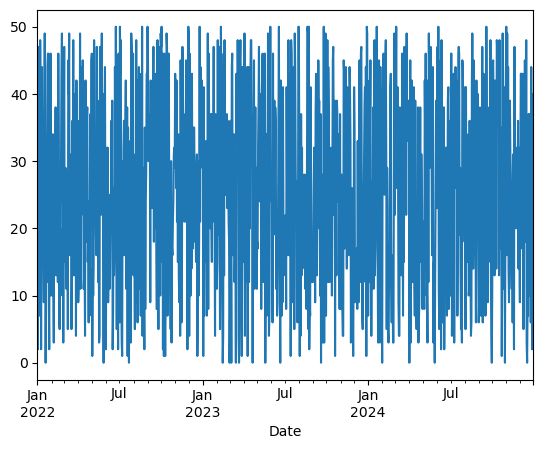

In [19]:
item_sales = data[data['Item Name'] == 'Toilet Brush']
item_sales.groupby('Date')['Sales'].sum().plot()

In [20]:
data.head()

,Date,Day,Item Name,Price,In Stock,Total Stock,Sales,Stock Left,Revenue
0,2022-01-01,Saturday,Tea,11.65,True,64,19,45,221.35
1,2022-01-01,Saturday,Shaving Cream,36.52,True,78,23,55,839.96
2,2022-01-01,Saturday,All-Purpose Cleaner,13.58,True,109,28,81,380.24
3,2022-01-01,Saturday,Rice,6.30,True,187,14,173,88.20
4,2022-01-01,Saturday,Perfume,43.33,True,137,0,137,0.00


### Most revenue generating month for each year

In [21]:
data['Month'] = data['Date'].dt.month
data['Year'] = data['Date'].dt.year
grouped_monthly = data.groupby(['Year', 'Month'])['Revenue'].sum().reset_index()

In [22]:
grouped_monthly['Month Name'] = grouped_monthly['Month'].map({1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun', 7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'})

In [23]:
# Sort by month
grouped_monthly = grouped_monthly.sort_values(by=['Year', 'Month'])
# grouped_monthly = grouped_monthly.sort_values(by='Month', key=lambda x: pd.Categorical(x, categories=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], ordered=True))
grouped_monthly[:14]

,Year,Month,Revenue,Month Name
0,2022,1,1928409.19,Jan
1,2022,2,1684004.67,Feb
2,2022,3,1852554.47,Mar
3,2022,4,1844784.30,Apr
4,2022,5,1878652.60,May
5,2022,6,1873574.18,Jun
6,2022,7,1919721.53,Jul
7,2022,8,1852425.62,Aug
8,2022,9,1821962.83,Sep
9,2022,10,1878679.21,Oct


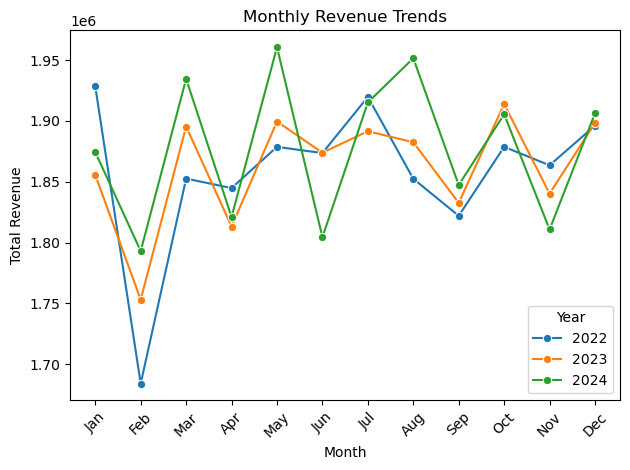

In [24]:
plt.Figure(figsize=(14, 8))
sns.lineplot(data=grouped_monthly, x='Month Name', y='Revenue', hue='Year', marker='o', palette='tab10')
plt.title('Monthly Revenue Trends')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.legend(title='Year')
plt.tight_layout()
plt.show()

### Identify which item sold most in each month of each year

In [25]:
group_sales = data.groupby(['Year', 'Month', 'Item Name'])['Sales'].sum().reset_index()
group_revenue = data.groupby(['Year', 'Month', 'Item Name'])['Revenue'].sum().reset_index()


In [26]:
# Top 3 selling items and revenue generating items
top_selling_items = group_sales.sort_values(['Year', 'Month', 'Sales'], ascending=[True, True, False]).groupby(['Year', 'Month']).head(3).reset_index(drop=True)
top_revenue_generating_items = group_revenue.sort_values(['Year', 'Month', 'Revenue'], ascending=[True, True, False]).groupby(['Year', 'Month']).head(3).reset_index(drop=True)
top_selling_items

,Year,Month,Item Name,Sales
0,2022,1,Batteries,1556
1,2022,1,Dish Soap,941
2,2022,1,Tequila,925
3,2022,2,Batteries,1583
4,2022,2,Lemon,941
...,...,...,...,...
103,2024,11,Lemon,935
104,2024,11,Strawberries,928
105,2024,12,Batteries,1599
106,2024,12,Vodka,1022


In [27]:
top_revenue_generating_items

,Year,Month,Item Name,Revenue
0,2022,1,Vodka,42894.02
1,2022,1,Toilet Brush,41184.72
2,2022,1,Shower Curtain,40155.40
3,2022,2,Vodka,37121.63
4,2022,2,Mugs,34272.00
...,...,...,...,...
103,2024,11,Floss,43521.00
104,2024,11,Trash Bags,39344.76
105,2024,12,Vodka,47962.46
106,2024,12,Floss,42298.50


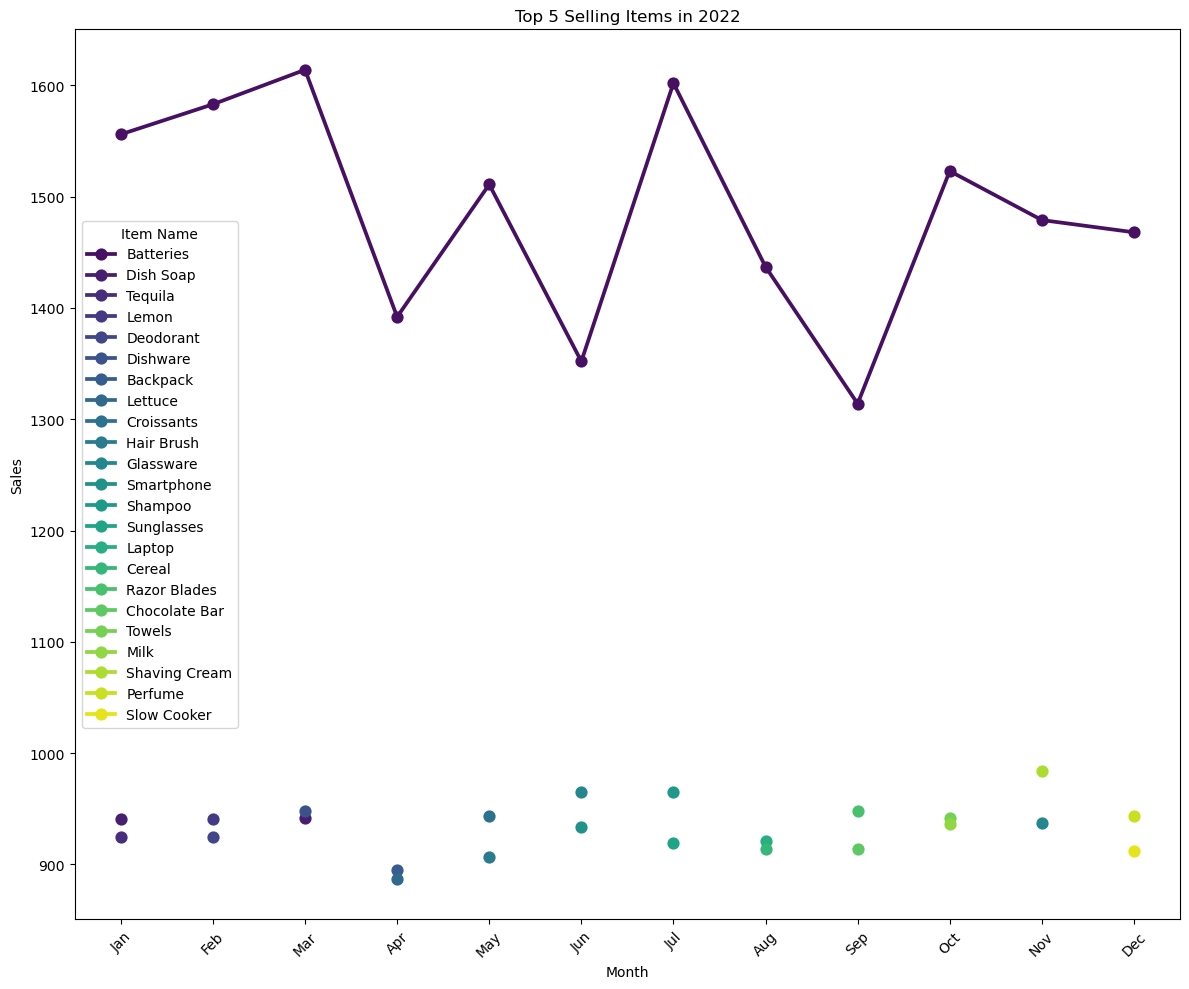

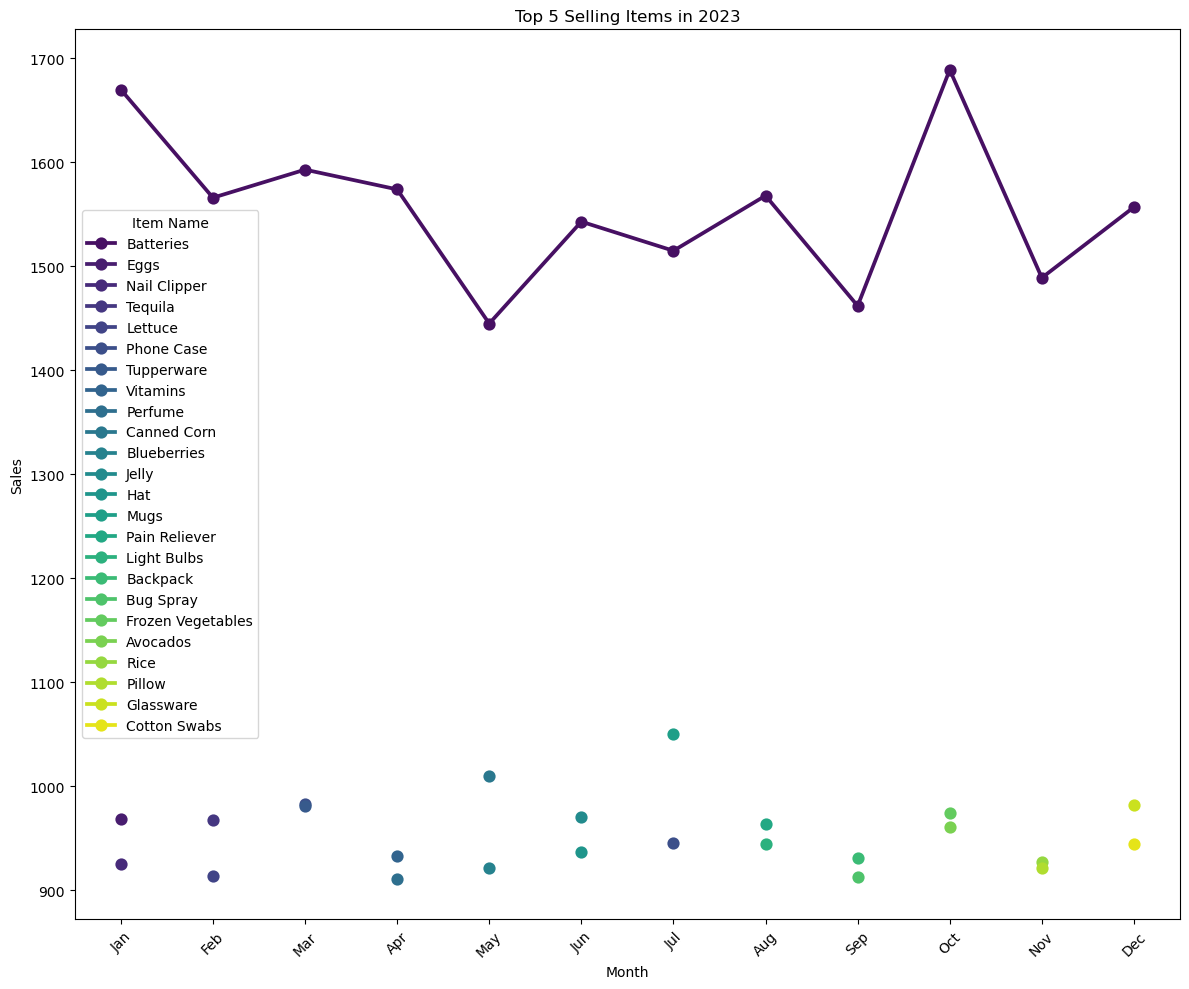

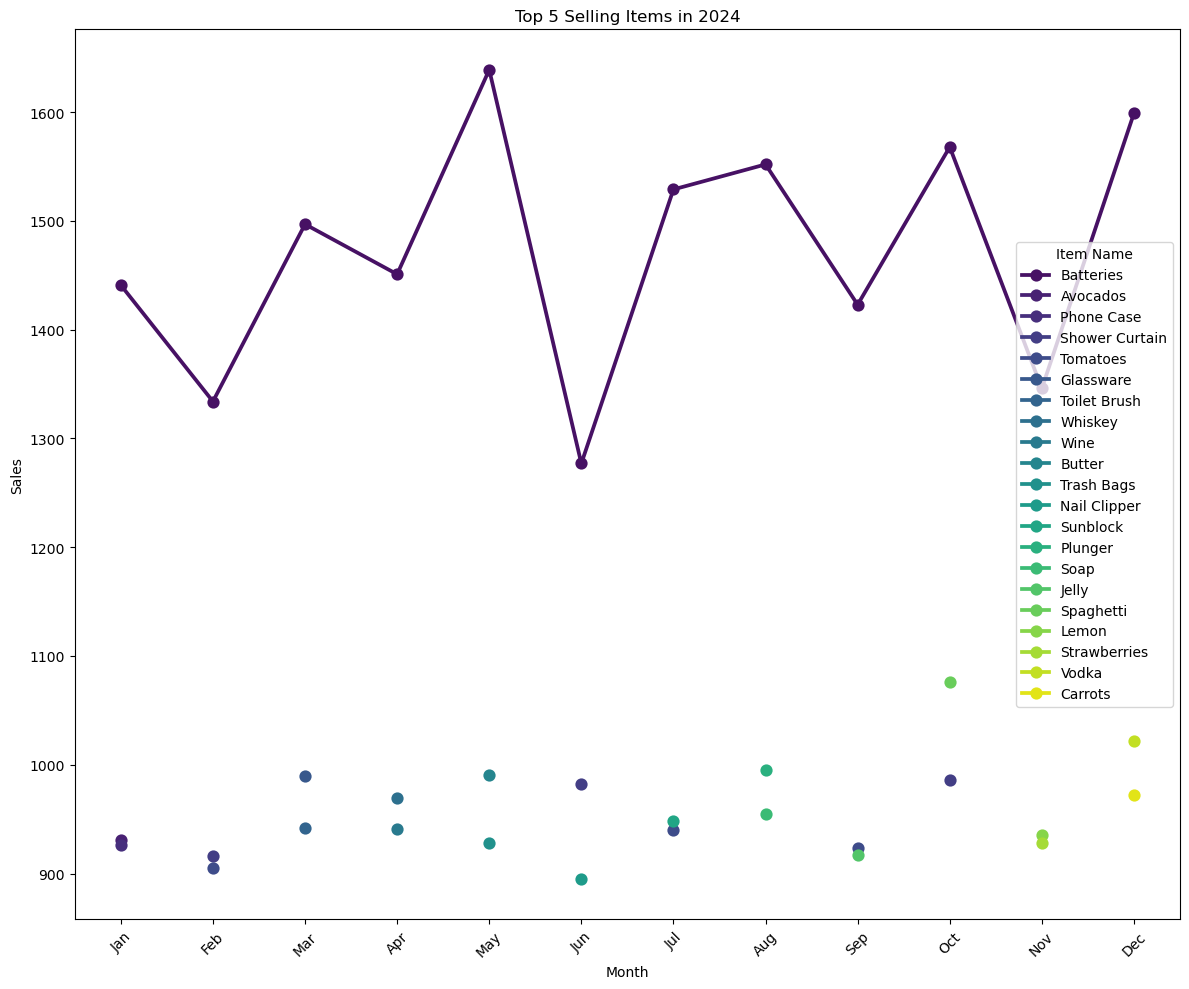

In [28]:
# Get unique years
unique_years = top_selling_items['Year'].unique()

# Set the number of rows and columns for plotting
n_rows = 1  # We will plot one graph per year
n_cols = len(unique_years)  # One column per year

# Create a plot for each year
for year in unique_years:
    # Filter data for the specific year
    data_year = top_selling_items[top_selling_items['Year'] == year]
    
    # Set up the plot for this year
    plt.figure(figsize=(12, 10))
    
    # Create a line plot for the year with markers
    sns.pointplot(data=data_year, x='Month', y='Sales', hue='Item Name', marker='o', palette='viridis')
    
    # Set x-axis labels and rotate
    plt.xticks(ticks=range(12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
                                         'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=45)
    
    # Set axis labels and title
    plt.xlabel('Month')
    plt.ylabel('Sales')
    plt.title(f'Top 5 Selling Items in {year}')
    
    # Add a legend
    plt.legend(title='Item Name')
    
    # Adjust the layout to make it clear
    plt.tight_layout()
    
    # Show the plot
    plt.show()

In [54]:
import pandas as pd
import numpy as np
from datetime import datetime
import holidays

def create_features(df):
    df = df.copy()
    
    # Time features
    df['month'] = df['Date'].dt.month
    df['quarter'] = df['Date'].dt.quarter
    df['year'] = df['Date'].dt.year
    df['dayofweek'] = df['Date'].dt.dayofweek
    df['is_weekend'] = df['dayofweek'].isin([5,6]).astype(int)
    
    # Item features
    df['stock_ratio'] = df['Stock Left'] / df['Total Stock']
    df['price_bins'] = pd.qcut(df['Price'], q=5, labels=['vlow', 'low', 'med', 'high', 'vhigh'])
    df['sales_ratio'] = df['Sales'] / df['Total Stock']
    
    # Rolling features (grouped by itemname)
    for window in [7, 30]:
        df[f'sales_ma_{window}d'] = df.groupby('itemname')['Sales'].transform(
            lambda x: x.rolling(window=window, min_periods=1).mean())
        df[f'revenue_ma_{window}d'] = df.groupby('itemname')['Revenue'].transform(
            lambda x: x.rolling(window=window, min_periods=1).mean())
        df[f'stock_ma_{window}d'] = df.groupby('itemname')['stockleft'].transform(
            lambda x: x.rolling(window=window, min_periods=1).mean())
    
    # Interaction features
    df['price_stock_ratio'] = df['price'] * df['stock_ratio']
    df['sales_price_ratio'] = df['sales'] * df['price']
    
    # Lag features (grouped by itemname)
    df['sales_lag1'] = df.groupby('itemname')['sales'].shift(1)
    df['sales_lag7'] = df.groupby('itemname')['sales'].shift(7)
    
    # Fill missing values
    df = df.fillna(method='bfill')
    
    return df

# Apply feature engineering
sales_data_featured = create_features(data)

# Split data for modeling
train_size = int(len(sales_data_featured) * 0.8)
train = sales_data_featured[:train_size]
test = sales_data_featured[train_size:]

# Separate features and target
features = ['dayofweek', 'month', 'quarter', 'is_weekend', 'is_holiday', 
           'lag_1', 'lag_7', 'lag_30', 'rolling_mean_7', 'rolling_mean_30']
X_train = train[features]
y_train = train['y']
X_test = test[features]
y_test = test['y']

# Modify ARIMA model to use exogenous variables
model = ARIMA(endog=y_train, exog=X_train, order=(1,1,1))
fitted_model = model.fit()

# Generate forecasts with exogenous variables
forecast = fitted_model.forecast(steps=len(test), exog=X_test)

# Calculate metrics
rmse = np.sqrt(mean_squared_error(y_test, forecast))
print(f'RMSE with features: {rmse:.2f}')

# Plot results
plt.figure(figsize=(12,6))
plt.plot(y_train.index[-30:], y_train[-30:], label='Training')
plt.plot(y_test.index[:30], y_test[:30], label='Actual')
plt.plot(y_test.index[:30], forecast[:30], label='Forecast')
plt.title('ARIMA Forecast with Feature Engineering')
plt.legend()
plt.show()

KeyError: 'stockleft'

In [29]:
#install prophet
!pip install statsmodels



In [30]:
from prophet import Prophet

/Users/rojalpradhan/miniforge3/envs/college/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Importing plotly failed. Interactive plots will not work.


17:02:36 - cmdstanpy - INFO - Chain [1] start processing
17:02:36 - cmdstanpy - INFO - Chain [1] done processing


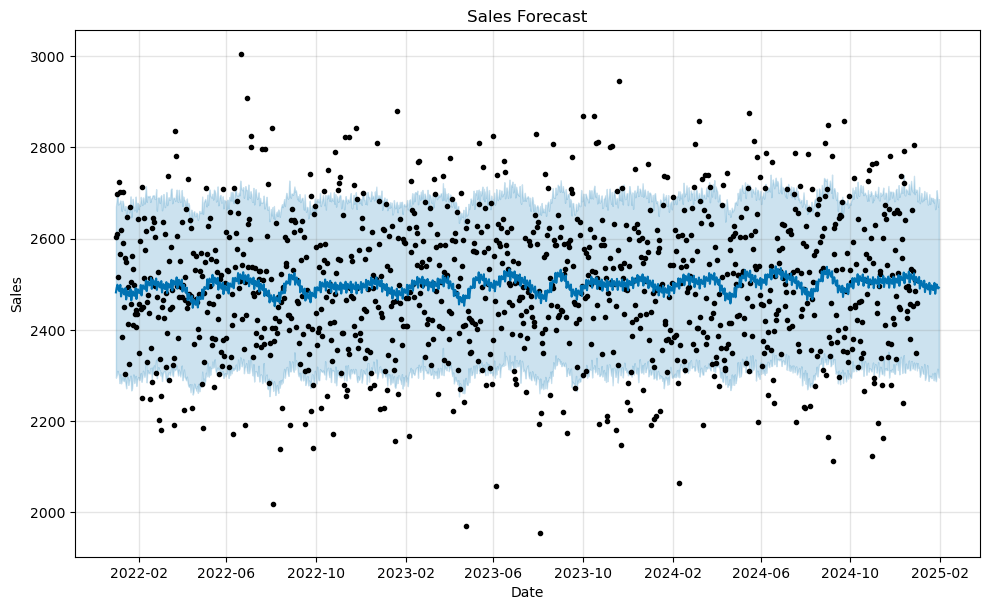

In [31]:
sales_data = data.groupby('Date')['Sales'].sum().reset_index()

# Rename columns for Prophet compatibility
sales_data.columns = ['ds', 'y']

# Initialize and fit the Prophet model
prophet_model = Prophet()
prophet_model.fit(sales_data)

# Create a future dataframe for forecasting (e.g., 30 days into the future)
future_dates = prophet_model.make_future_dataframe(periods=30)

# Forecast sales
forecast = prophet_model.predict(future_dates)

# Plot the forecast
fig = prophet_model.plot(forecast)
plt.title("Sales Forecast")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.show()

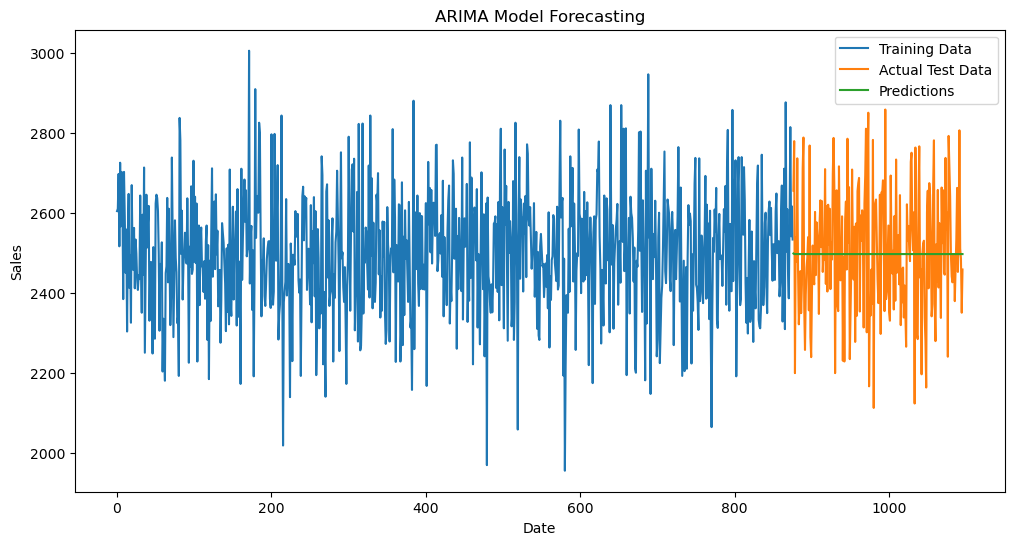

RMSE: 154.80
MAE: 125.87

Model Summary:
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  876
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -5621.563
Date:                Thu, 23 Jan 2025   AIC                          11249.126
Time:                        17:02:38   BIC                          11263.448
Sample:                             0   HQIC                         11254.604
                                - 876                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0389      0.035      1.099      0.272      -0.030       0.108
ma.L1         -0.9991      0.013    -78.570      0.000      -1.024      -0.974
sigma2     

In [32]:

train_size = int(len(sales_data) * 0.8)
train = sales_data['y'][:train_size]
test = sales_data['y'][train_size:]

# Create and fit ARIMA model
model = ARIMA(train, order=(1,1,1))  # p,d,q parameters
fitted_model = model.fit()

# Generate predictions
forecast = fitted_model.forecast(steps=len(test))

# Calculate error metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error
rmse = np.sqrt(mean_squared_error(test, forecast))
mae = mean_absolute_error(test, forecast)

# Visualize results
plt.figure(figsize=(12,6))
plt.plot(train.index, train, label='Training Data')
plt.plot(test.index, test, label='Actual Test Data')
plt.plot(test.index, forecast, label='Predictions')
plt.title('ARIMA Model Forecasting')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()

# Print performance metrics
print(f'RMSE: {rmse:.2f}')
print(f'MAE: {mae:.2f}')
print('\nModel Summary:')
print(fitted_model.summary())

In [34]:
!pip install pmdarima

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 630.4/630.4 kB 11.1 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 35.5 MB/s eta 0:00:00


In [35]:
from pmdarima import auto_arima

# Find optimal parameters
auto_model = auto_arima(train, 
                       start_p=0, start_q=0, max_p=3, max_q=3,
                       seasonal=False,
                       stepwise=True,
                       trace=True)

# Fit model with optimal parameters
optimal_order = auto_model.order
model = ARIMA(train, order=optimal_order)
fitted_model = model.fit()

# Compare results
forecast = fitted_model.forecast(steps=len(test))
new_rmse = np.sqrt(mean_squared_error(test, forecast))
print(f'New RMSE: {new_rmse:.2f}')

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=16196.167, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=inf, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=inf, Time=0.05 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=inf, Time=0.19 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=11253.925, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=11254.660, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=11254.684, Time=0.02 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=11256.653, Time=0.08 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 0.413 seconds
New RMSE: 154.83


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.54826D+00    |proj g|=  6.05967D-02

At iterate    5    f=  6.48478D+00    |proj g|=  2.21707D-02

At iterate   10    f=  6.47868D+00    |proj g|=  2.46045D-03

At iterate   15    f=  6.35555D+00    |proj g|=  2.17778D-01

At iterate   20    f=  6.31955D+00    |proj g|=  6.45201D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     23     33      1     0     0   1.393D-05   6.320D+00
  F =   6.3195516118377855     

CONVERG

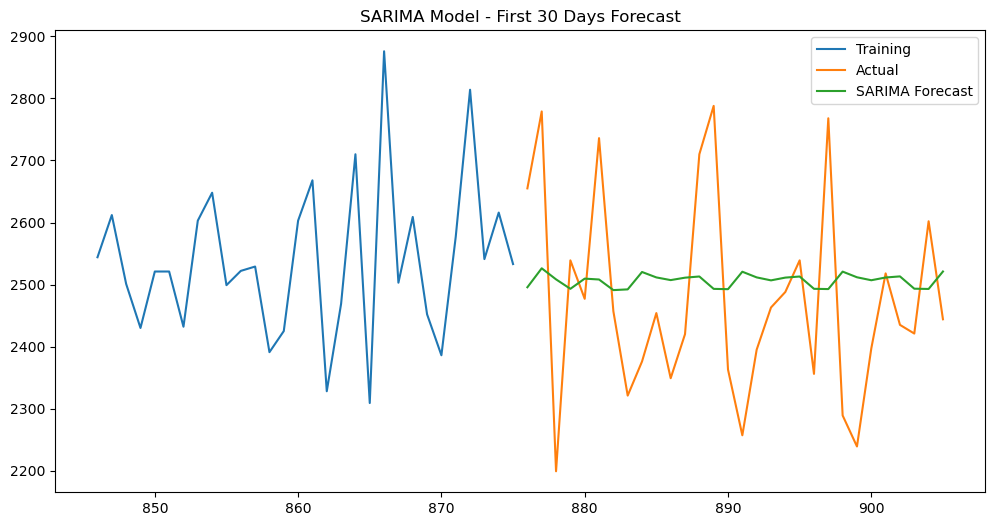

In [36]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Try SARIMA model with seasonal component
sarima_model = SARIMAX(train,
                      order=(1, 1, 1),           # non-seasonal (p,d,q)
                      seasonal_order=(1, 1, 1, 7),  # seasonal (P,D,Q,s) - weekly seasonality
                      enforce_stationarity=False)

fitted_sarima = sarima_model.fit()

# Generate predictions
sarima_forecast = fitted_sarima.forecast(steps=len(test))

# Calculate new metrics
sarima_rmse = np.sqrt(mean_squared_error(test, sarima_forecast))
sarima_mae = mean_absolute_error(test, sarima_forecast)

print(f'SARIMA RMSE: {sarima_rmse:.2f}')
print(f'SARIMA MAE: {sarima_mae:.2f}')

# Plot results
plt.figure(figsize=(12,6))
plt.plot(train.index[-30:], train[-30:], label='Training')
plt.plot(test.index[:30], test[:30], label='Actual')
plt.plot(test.index[:30], sarima_forecast[:30], label='SARIMA Forecast')
plt.title('SARIMA Model - First 30 Days Forecast')
plt.legend()
plt.show()

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error
from prophet import Prophet

# Load data and check structure
sales_data = pd.read_csv('../data/retail_store_data_with_real_items.csv')  # Adjust filename as needed
sales_data['Date'] = pd.to_datetime(sales_data['Date'])
sales_data.set_index('Date', inplace=True)

# Check and handle missing values
print("Missing values:", sales_data.isnull().sum())
sales_data = sales_data.fillna(method='ffill')

# Split data
train_size = int(len(sales_data) * 0.8)
train = sales_data['Sales'][:train_size]
test = sales_data['Sales'][train_size:]

# ARIMA model
model = ARIMA(train, order=(1,1,1))
fitted_model = model.fit()
forecast = fitted_model.forecast(steps=len(test))

# Prophet model
df_prophet = pd.DataFrame({
    'ds': sales_data.index,
    'y': sales_data['Sales']
})
train_prophet = df_prophet[:train_size]
test_prophet = df_prophet[train_size:]

model_prophet = Prophet(yearly_seasonality=True, weekly_seasonality=True)
model_prophet.fit(train_prophet)
future = model_prophet.make_future_dataframe(periods=len(test_prophet))
forecast_prophet = model_prophet.predict(future)

# Compare metrics
arima_rmse = np.sqrt(mean_squared_error(test, forecast))
prophet_rmse = np.sqrt(mean_squared_error(test_prophet['y'], 
                      forecast_prophet['yhat'][-len(test_prophet):]))

print(f'ARIMA RMSE: {arima_rmse:.2f}')
print(f'Prophet RMSE: {prophet_rmse:.2f}')

Missing values: Day            0
Item Name      0
Price          0
In Stock       0
Total Stock    0
Sales          0
Stock Left     0
Revenue        0
dtype: int64


/var/folders/m5/flclr2h56f56f4j7mr5_8qk80000gn/T/ipykernel_3488/503840888.py:15: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  sales_data = sales_data.fillna(method='ffill')
/Users/rojalpradhan/miniforge3/envs/college/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/rojalpradhan/miniforge3/envs/college/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/rojalpradhan/miniforge3/envs/college/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no

ARIMA RMSE: 14.71
Prophet RMSE: 15.55


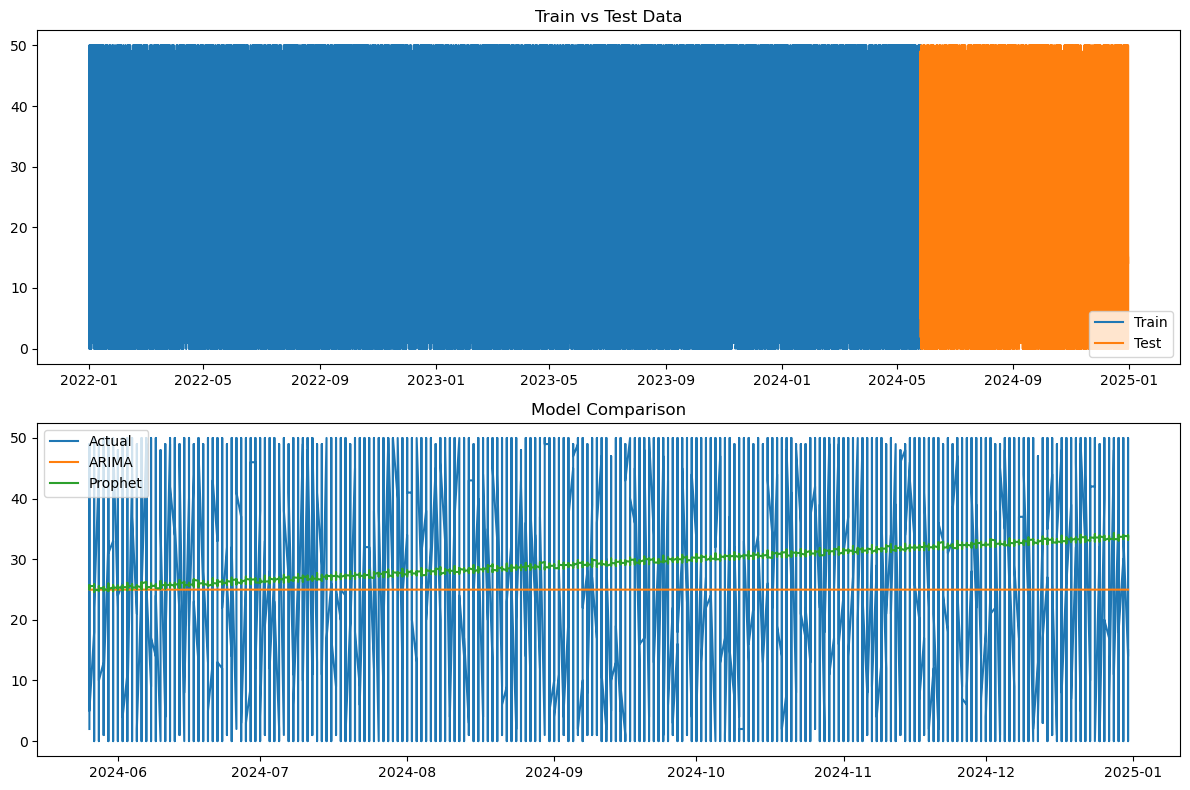

TypeError: too many positional arguments

In [49]:
# 1. Data Visualization
plt.figure(figsize=(12,8))
plt.subplot(211)
plt.plot(train.index, train, label='Train')
plt.plot(test.index, test, label='Test')
plt.title('Train vs Test Data')
plt.legend()

plt.subplot(212)
plt.plot(test.index, test, label='Actual')
plt.plot(test.index, forecast, label='ARIMA')
plt.plot(test.index, forecast_prophet['yhat'][-len(test):], label='Prophet')
plt.title('Model Comparison')
plt.legend()
plt.tight_layout()
plt.show()

# 2. Detailed Metrics
from sklearn.metrics import r2_score, mean_absolute_percentage_error

metrics = pd.DataFrame({
    'ARIMA': {
        'RMSE': np.sqrt(mean_squared_error(test, forecast)),
        'MAE': mean_absolute_error(test, forecast),
        'MAPE': mean_absolute_percentage_error(test, forecast),
        'R2': r2_score(test, forecast)
    },
    'Prophet': {
        'RMSE': np.sqrt(mean_squared_error(test, forecast_prophet['yhat'][-len(test):])),
        'MAE': mean_absolute_error(test, forecast_prophet['yhat'][-len(test):], test),
        'MAPE': mean_absolute_percentage_error(test, forecast_prophet['yhat'][-len(test):]),
        'R2': r2_score(test, forecast_prophet['yhat'][-len(test):])
    }
})

print("\nModel Performance Metrics:")
print(metrics)

# 3. Best Model Selection
best_model = 'ARIMA' if metrics.loc['RMSE', 'ARIMA'] < metrics.loc['RMSE', 'Prophet'] else 'Prophet'
print(f"\nBest Model: {best_model}")

/Users/rojalpradhan/miniforge3/envs/college/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/rojalpradhan/miniforge3/envs/college/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/rojalpradhan/miniforge3/envs/college/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/rojalpradhan/miniforge3/envs/college/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provide

Best ARIMA parameters (p,d,q): (1, 0, 0)


/Users/rojalpradhan/miniforge3/envs/college/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/rojalpradhan/miniforge3/envs/college/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/rojalpradhan/miniforge3/envs/college/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/rojalpradhan/miniforge3/envs/college/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is availab

RMSE: 14.71
MAE: 12.74


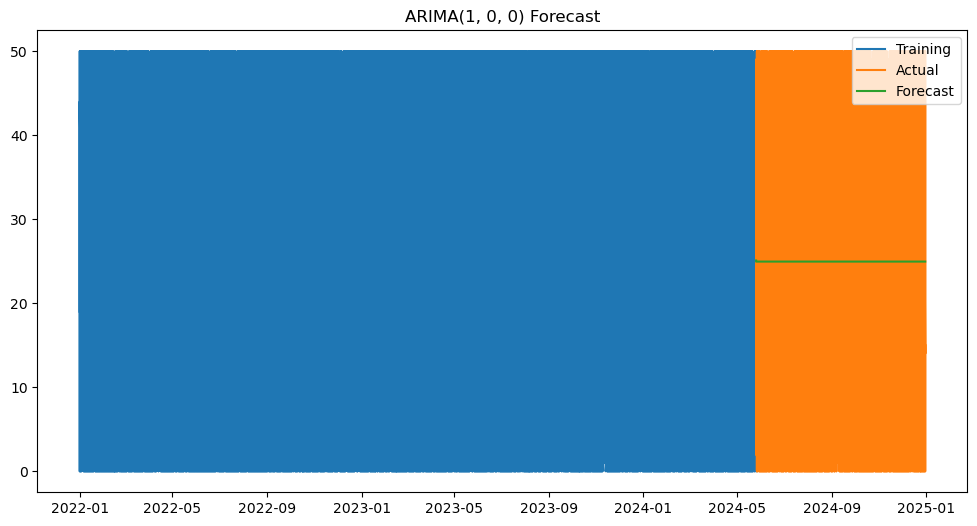

In [51]:
# 1. Fix ARIMA implementation
train_size = int(len(sales_data) * 0.8)
train = sales_data['Sales'][:train_size]
test = sales_data['Sales'][train_size:]

# 2. Grid search for optimal parameters
from itertools import product

# Define parameter grid
p = d = q = range(0, 2)
pdq = list(product(p, d, q))

# Find best parameters
best_aic = float('inf')
best_params = None

for param in pdq:
    try:
        model = ARIMA(endog=train, order=param)
        results = model.fit()
        if results.aic < best_aic:
            best_aic = results.aic
            best_params = param
    except:
        continue

print(f'Best ARIMA parameters (p,d,q): {best_params}')

# 3. Fit model with optimal parameters
final_model = ARIMA(endog=train, order=best_params)
fitted_model = final_model.fit()

# 4. Generate forecasts
forecast = fitted_model.forecast(steps=len(test))

# 5. Calculate metrics
rmse = np.sqrt(mean_squared_error(test, forecast))
mae = mean_absolute_error(test, forecast)

print(f'RMSE: {rmse:.2f}')
print(f'MAE: {mae:.2f}')

# 6. Plot results
plt.figure(figsize=(12,6))
plt.plot(train.index, train, label='Training')
plt.plot(test.index, test, label='Actual')
plt.plot(test.index, forecast, label='Forecast')
plt.title(f'ARIMA{best_params} Forecast')
plt.legend()
plt.show()

ADF Statistic: -32.5469356921276
p-value: 0.0
Time series is stationary.


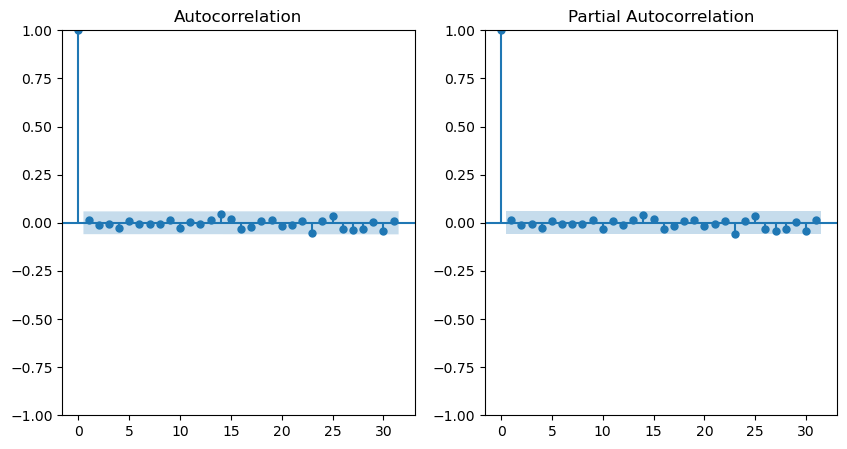

/Users/rojalpradhan/miniforge3/envs/college/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/rojalpradhan/miniforge3/envs/college/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/rojalpradhan/miniforge3/envs/college/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  Sales   No. Observations:                 1096
Model:                 ARIMA(1, 1, 2)   Log Likelihood               -7043.307
Date:                Thu, 23 Jan 2025   AIC                          14094.613
Time:                        17:02:38   BIC                          14114.607
Sample:                    01-01-2022   HQIC                         14102.179
                         - 12-31-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9222      0.112     -8.269      0.000      -1.141      -0.704
ma.L1         -0.0634      0.102     -0.620      0.535      -0.264       0.137
ma.L2         -0.9359      0.102     -9.135      0.0

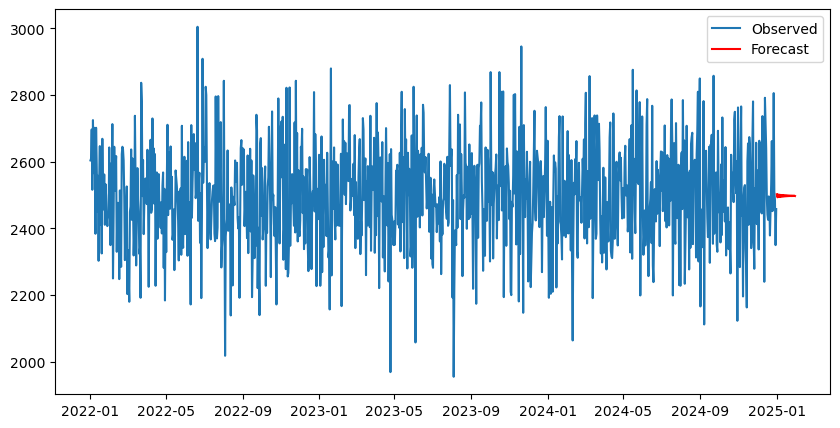

In [33]:
sales_data = data.groupby('Date')['Sales'].sum()

# Step 2: Check for stationarity
result = adfuller(sales_data)
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
if result[1] > 0.05:
    print("Time series is not stationary. Differencing will be applied.")
    sales_data_diff = sales_data.diff().dropna()
else:
    print("Time series is stationary.")
    sales_data_diff = sales_data

# Step 3: Plot ACF and PACF
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plt.figure(figsize=(10, 5))
plt.subplot(121)
plot_acf(sales_data_diff, ax=plt.gca())
plt.subplot(122)
plot_pacf(sales_data_diff, ax=plt.gca())
plt.show()

# Step 4: Fit ARIMA Model
model = ARIMA(sales_data, order=(1, 1, 2))  # Adjust (p, d, q) based on ACF/PACF
fitted_model = model.fit()
print(fitted_model.summary())

# Step 5: Forecast
forecast = fitted_model.forecast(steps=30)  # Forecast the next 30 days
plt.figure(figsize=(10, 5))
plt.plot(sales_data, label='Observed')
plt.plot(forecast, label='Forecast', color='red')
plt.legend()
plt.show()